In [1]:
import datetime
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [14]:
data_dir = pathlib.Path('data').resolve()
csv = {
    'relay_users': 'relay_users.csv',
    'bridge_users_by_country': 'bridge_users_by_country.csv',
    'top_10_countries_by_censorship_events': 'top_10_countries_by_censorship_events.csv',
    'relays_and_bridges': 'relays_and_bridges.csv',
    'relays_by_tor_versions': 'relays_by_tor_versions.csv',
    'relays_by_platform': 'relays_by_platform.csv',
    'total_bandwidth': 'total_bandwidth.csv',
    'ad_cs_bandwidth': 'ad_cs_bandwidth.csv',
    'bandwidth_by_ip_version': 'bandwidth_by_ip_version.csv',
    'tor_downloads': 'tor_downloads.csv',
    'tor_download_timeouts_and_failures': 'tor_download_timeouts_and_failures.csv',
    'circuit_build_times': 'circuit_build_times.csv',
    'circuit_latency': 'circuit_latency.csv',
    'throughput': 'throughput.csv',
    'all_versions_traffic': 'all_versions_traffic.csv',
    'v2_traffic': 'v2_traffic.csv',
    'v3_traffic': 'v3_traffic.csv',
    'tor_browser_updates_and_downloads': 'tor_browser_updates_and_downloads.csv',
    'tor_browser_upd_and_dl_by_platform': 'tor_browser_upd_and_dl_by_platform.csv'
}

In [16]:
def aggregated(**kwargs):
    df = pd.read_csv(data_dir / csv.get(kwargs.get('source')))
    if 'na_substitutions' in kwargs:
        df = df.fillna(value=kwargs.get('na_substitutions'))
    if 'types' in kwargs:
        for column, dtype in kwargs.get('types').items():
            df[column] = df[column].astype(dtype)
    if 'transforms' in kwargs:
        for column, transform in kwargs.get('transforms').items():
            df[column] = df[column].apply(transform)
    
    df = df.groupby(kwargs.get('by')).aggregate(kwargs.get('agg')).reset_index()
    
    return df

In [55]:
def plot(**kwargs):
    fig, ax = plt.subplots(1, 1, figsize=(16, 9), constrained_layout=True)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    if 'xlabel' in kwargs:
        ax.set_ylabel(kwargs.get('xlabel'))
    if 'ylabel' in kwargs:
        ax.set_ylabel(kwargs.get('ylabel'))
    
    data = kwargs.get('data')
    x = kwargs.get('x')
    y = kwargs.get('y')
    if 'countries' in kwargs:
        for country in kwargs.get('countries'):
            ax.plot(x, y, data=data[data['country'] == country])
    else:
        ax.plot(x, y, data=data)
    plt.show()

In [ ]:
def bar(**kwargs):
    fig, ax = plt.subplots(1, 1, figsize=(16, 9), constrained_layout=True)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    if 'xlabel' in kwargs:
        ax.set_ylabel(kwargs.get('xlabel'))
    if 'ylabel' in kwargs:
        ax.set_ylabel(kwargs.get('ylabel'))
    
    data = kwargs.get('data')
    x = kwargs.get('x')
    y = kwargs.get('y')
    ax.plot(x, y, data=data[data['country'] == 'all'])
    if 'countries' in kwargs:
        for country in kwargs.get('countries'):
            ax.plot(x, y, data=data[data['country'] == country])
    plt.show()

In [26]:
dataframes = {}

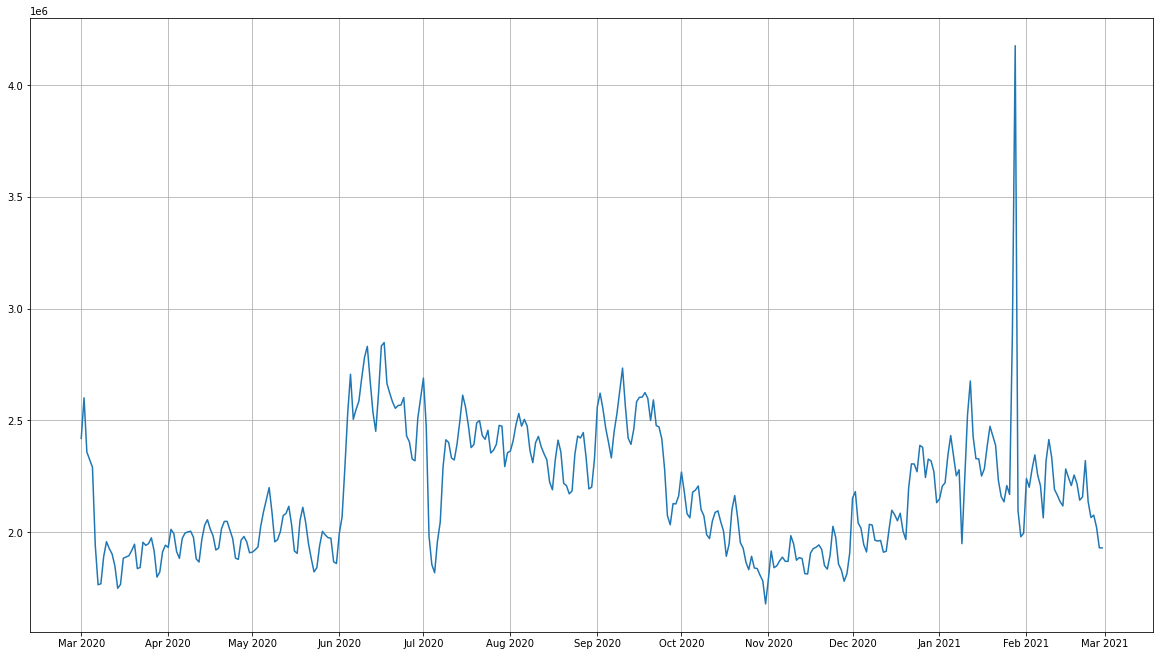

In [56]:
source = 'relay_users'
kwargs = {
    'source': source,
    'na_substitutions': {
        'country': 'all'
    },
    'types': {
        'date': 'M',
        'country': 'category'
    },
    'by': ['date', 'country'],
    'agg': np.sum
}
dataframes[source] = aggregated(**kwargs)
plot(data=dataframes[source], x='date', y='users', countries=['all'])

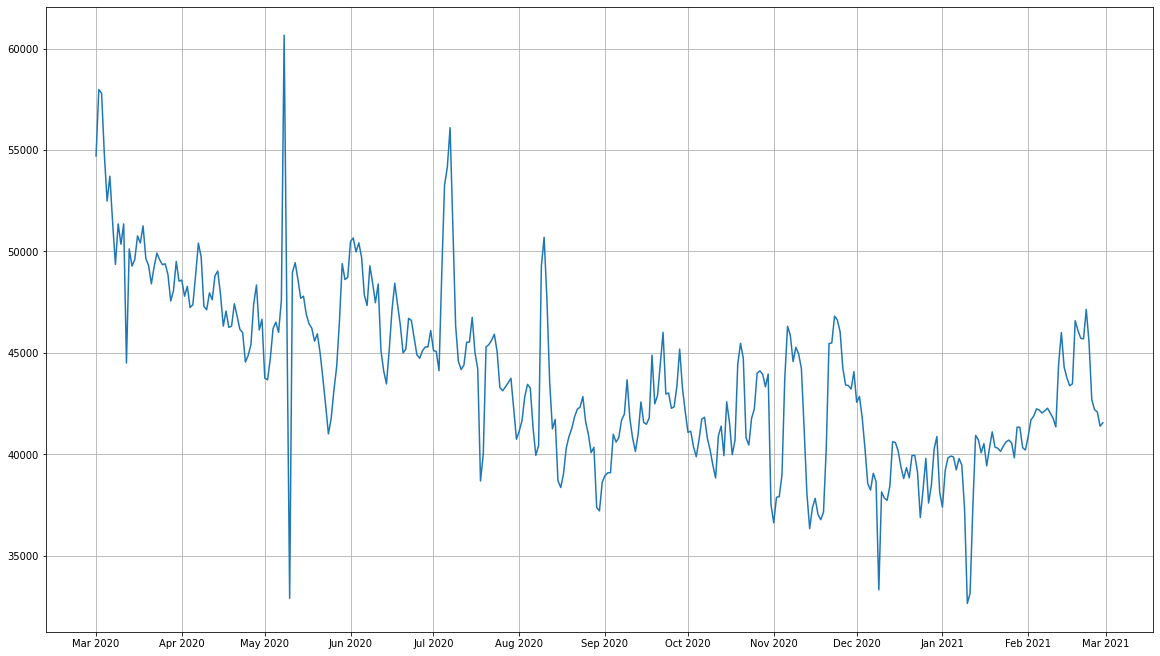

In [57]:
source = 'bridge_users_by_country'
kwargs = {
    'source': source,
    'na_substitutions': {
        'country': 'all'
    },
    'types': {
        'date': 'M',
        'country': 'category'
    },
    'by': ['date', 'country'],
    'agg': np.sum
}
dataframes[source] = aggregated(**kwargs)
plot(data=dataframes[source], x='date', y='users', countries=['all'])

In [58]:
source = 'top_10_countries_by_censorship_events'
dataframes[source] = pd.read_csv(data_dir / csv.get(source))
dataframes[source]['Country'] = dataframes[source]['Country'].astype('category')

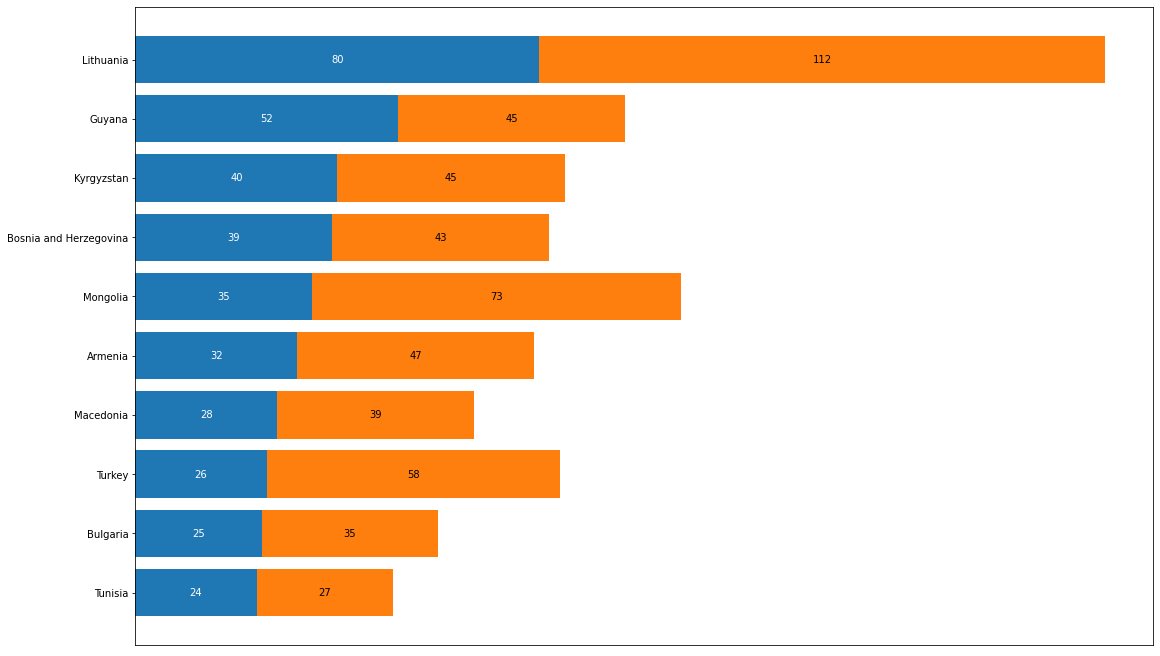

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9), constrained_layout=True)
#category_colors = plt.colormaps['RdYlGn'](np.linspace(0.15, 0.85, data.))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
rects = ax.barh(dataframes[source]['Country'], dataframes[source]['Downturns'])
ax.bar_label(rects, label_type='center', color='white')
rects = ax.barh(dataframes[source]['Country'], dataframes[source]['Upturns'], left=dataframes[source]['Downturns'])
ax.bar_label(rects, label_type='center', color='black')
#ax.legend(ncol=2, bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
plt.show()

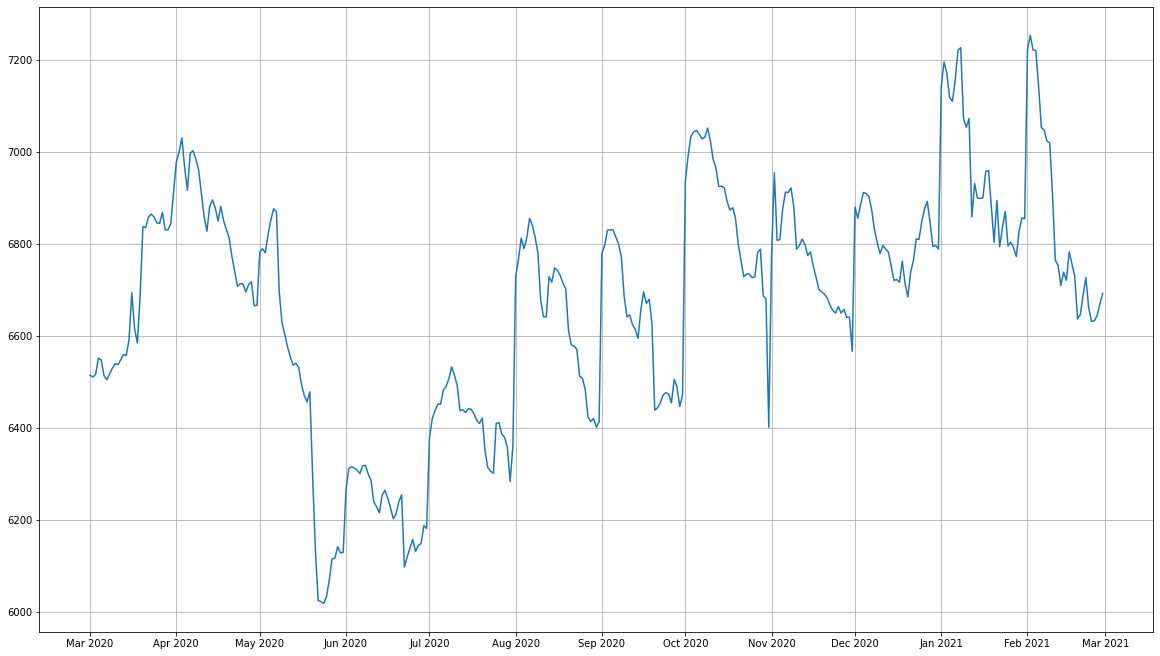

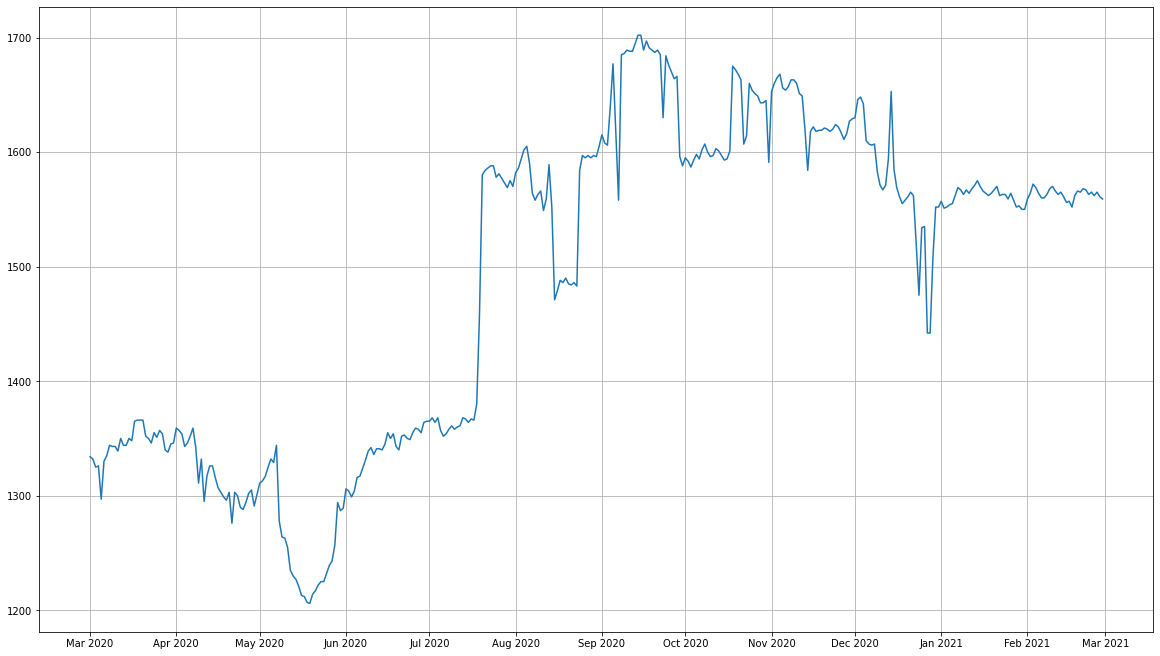

In [68]:
source = 'relays_and_bridges'
dataframes[source] = pd.read_csv(data_dir / csv.get(source))
dataframes[source]['date'] = dataframes[source]['date'].astype('M')
plot(data=dataframes[source], x='date', y='relays')
plot(data=dataframes[source], x='date', y='bridges')

In [71]:
source = 'relays_by_tor_versions'
dataframes[source] = pd.read_csv(data_dir / csv.get(source))
dataframes[source]['date'] = dataframes[source]['date'].astype('M')
dataframes[source].info()
#plot(data=dataframes[source], x='date', y='relays')
#plot(data=dataframes[source], x='date', y='bridges')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2348 non-null   datetime64[ns]
 1   version  2348 non-null   object        
 2   relays   2348 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 55.2+ KB
